<a href="https://colab.research.google.com/github/Gauravkumarlokhande/Gauravkumarlokhande/blob/main/Decision_Tree_user_input_sample_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Red Wine Quality.csv')

In [ ]:

def unique(value):
  if value<=4:
    return 0
  elif value>4:
    return 1

In [ ]:
data['quality']=data['quality'].apply(unique)

# ***Decision tree classifier***

Please enter the name of your dependent variable (same as given in the data): quality
please select the size for testing (should be a decimal between 0 and 1): 0.4
please specify the random state: 101
----------------------------------------------------------------------------------------------
shape of x_train= (959, 11)
shape of x_test= (640, 11)
shape of y_train= (959,)
shape of y_test= (640,)
----------------------------------------------------------------------------------------------
Do you want to scale the data (yes or no): no
You have choosen not to scale the data
-----------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------
Accuracy score for training data:  1.0
Accuracy score for testing data:  0.9078125
--------------------------------------------------------------------------------------------------
Classification report for training data
     

Text(0, 0.5, 'True Positive Rate---->')

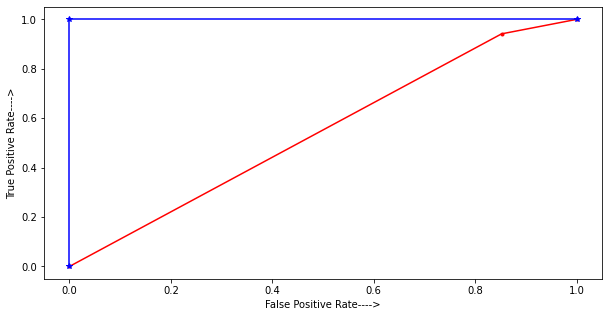

In [ ]:
dept=str(input('Please enter the name of your dependent variable (same as given in the data): '))
y=data[dept]
x=data.drop(columns=[dept])

test=float(input('please select the size for testing (should be a decimal between 0 and 1): '))
state=int(input('please specify the random state: '))
import random
random.seed(10)
from sklearn.model_selection import train_test_split as tst
x_train,x_test,y_train,y_test=tst(x,y,random_state=state,test_size=test)
print('----------------------------------------------------------------------------------------------')
print('shape of x_train= {}'.format(x_train.shape))
print('shape of x_test= {}'.format(x_test.shape))
print('shape of y_train= {}'.format(y_train.shape))
print('shape of y_test= {}'.format(y_test.shape))
print('----------------------------------------------------------------------------------------------')

choice=str(input('Do you want to scale the data (yes or no): '))
if choice=='yes':
    from sklearn.preprocessing import StandardScaler as STD
    st=STD()
    x_train=st.fit_transform(x_train)
    x_test=st.fit_transform(x_test)
else:
    print('You have choosen not to scale the data')
print('-----------------------------------------------------------------------------------------------')
from sklearn.tree import DecisionTreeClassifier as DTC
dt=DTC()
dt.fit(x_train,y_train)
print('------------------------------------------------------------------------------------------------')
print('Accuracy score for training data: ', dt.score(x_train,y_train))
print('Accuracy score for testing data: ',dt.score(x_test,y_test))

y_pred_train=dt.predict(x_train)
y_pred_test=dt.predict(x_test)

from sklearn.metrics import classification_report, auc, roc_curve, confusion_matrix
print('--------------------------------------------------------------------------------------------------')
print('Classification report for training data')
print(classification_report(y_train,y_pred_train))
print('--------------------------------------------------------------------------------------------------')

print('Classification report for testing data')
print(classification_report(y_test,y_pred_test))
print('--------------------------------------------------------------------------------------------------')

print('Confusion matrix')
print(confusion_matrix(y_test,y_pred_test))
print('--------------------------------------------------------------------------------------------------')

import matplotlib.pyplot as plt

dt_fpr,dt_tpr,threshold=roc_curve(y_test,y_pred_test)
dt_fpr_train,dt_tpr_train,threshold=roc_curve(y_train,y_pred_train)

auc_dt=auc(dt_fpr,dt_tpr)
auc_dt_train=auc(dt_fpr_train,dt_tpr_train)

plt.figure(figsize=(10,5))
plt.plot(dt_fpr,dt_tpr,marker='.',color='red')
plt.plot(dt_fpr_train,dt_tpr_train,marker='*',color='blue')

plt.xlabel('False Positive Rate---->')
plt.ylabel('True Positive Rate---->')
